In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import re
import io
import matplotlib.pylab as plt
from fa2 import ForceAtlas2
import json
import ast
from collections import Counter
import pickle

In [3]:
#Open movie data file
df = pd.read_csv('./../../the-movies-dataset-short/credits_short.csv', encoding ='utf-8')
number_of_movies = len(df.index)

In [4]:
def get_actors(movie_cast):
    cast_list = []
    for cast_object in movie_cast:
        cast_list.append(cast_object['name'])
    return cast_list


def list_all_actors():
    l = []
    for i, movie_id in enumerate(df['id'], start = 0):
        try:
            cast = df.loc[df['id']==movie_id]['cast'].item()
            cast_objects = ast.literal_eval(cast)
            list_of_actors = get_actors(cast_objects)
            l = l + list_of_actors
        except:
            pass
    return l

def list_actors_in_multiple_movies():
    l = list_all_actors()
    cnt = Counter(l)
    return ([k for k, v in cnt.items() if v > 1])

def get_director(movie_crew):
    for crew_object in movie_crew:
        if (crew_object['job'] == 'Director'):
            return crew_object['name']

In [5]:
# Create director network where directors are connected if they employed the same actors
# Warning! Takes forever to run!
directors_network = nx.Graph()
directors_errors = []
for i, movie_id in enumerate(df['id'], start = 0):
    if not i % 100: 
        print (str((i/number_of_movies)*100) +'% done')
    try:
        # get cast
        cast = df.loc[df['id']==movie_id]['cast'].item()
        cast_objects = ast.literal_eval(cast)
        list_of_actors = get_actors(cast_objects)
        
        # get director
        crew = df.loc[df['id']==movie_id]['crew'].item()
        crew_object = ast.literal_eval(crew)
        director = get_director(crew_object)
        # add director to network
        if not director in directors_network:
            directors_network.add_node(director)
        # find movies who share at least one actor 
        # we only run the loop though movies that we have not already used, 
        # as these will already be in the graph
        for other_movie in df['id']:
            try:
                cast_other_movie = df.loc[df['id']==other_movie]['cast'].item()
                cast_objects_other_movie = ast.literal_eval(cast_other_movie)
                actors = get_actors(cast_objects_other_movie)
                
                other_crew = df.loc[df['id']==other_movie]['crew'].item()
                crew_object = ast.literal_eval(other_crew)
                other_director = get_director(crew_object)
                # if there are actors in common
                if (set(list_of_actors) & set(actors) and director != other_director):
                    if not other_director in directors_network:
                        directors_network.add_node(other_director)
                    # if edge exists, then update weight
                    if (directors_network.has_edge(other_director, director)):
                        directors_network[other_director][director]['weight'] += 1
                    # otherwise add edge
                    else:
                        directors_network.add_edge(other_director, director, weight=1)
            except: 
                directors_errors.append(['error in other movie with id: '+ (other_movie)])
    except:
        directors_errors.append(['error in movie with id: '+ str(movie_id)])

0.0% done


C:\Users\pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `item` has been deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `item` has been deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
C:\Users\pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version


2.0% done
4.0% done
6.0% done
8.0% done
10.0% done
12.0% done
14.000000000000002% done
16.0% done
18.0% done
20.0% done
22.0% done
24.0% done
26.0% done
28.000000000000004% done
30.0% done
32.0% done
34.0% done
36.0% done
38.0% done
40.0% done
42.0% done
44.0% done
46.0% done
48.0% done
50.0% done
52.0% done
54.0% done
56.00000000000001% done
57.99999999999999% done
60.0% done
62.0% done
64.0% done
66.0% done
68.0% done
70.0% done
72.0% done
74.0% done
76.0% done
78.0% done
80.0% done
82.0% done
84.0% done
86.0% done
88.0% done
90.0% done
92.0% done
94.0% done
96.0% done
98.0% done


In [9]:
directors_network.number_of_edges()

87674

In [8]:
nx.write_gpickle(directors_network,"directors_network.gpickle")

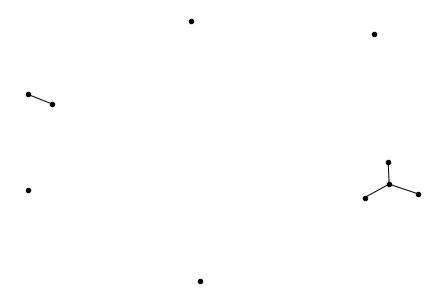

In [47]:
options = {'node_color': 'black',  
           'node_size': 20,
           'width': 1,}
nx.draw_spring(directors_network, **options)

In [9]:
actors_network = nx.Graph()
actors_to_include = list_actors_in_multiple_movies()
actors_errors = []
for i, movie_id in enumerate(df['id'], start = 0):
    if not i % 100: 
         print(str((i/number_of_movies)*100) +'% done')
    try:
        cast = df.loc[df['id']==movie_id]['cast'].item()
        cast_objects = ast.literal_eval(cast)
        list_of_actors = get_actors(cast_objects)
        for index, actor1 in enumerate(list_of_actors,start = 0):
            if True:#(actor1 in actors_to_include):
                if not actor1 in actors_network: 
                    actors_network.add_node(actor1)
                for actor2 in list_of_actors[index:]:
                    if True:#(actor2 in actors_to_include):
                        if not actor2 in actors_network: 
                            actors_network.add_node(actor2)
                        # if edge exists, then update weight
                        if (actors_network.has_edge(actor1, actor2)):
                            actors_network[actor1][actor2]['weight'] += 1
                        # otherwise add edge
                        else:
                            actors_network.add_edge(actor1, actor2, weight=1)
    except:
        actors_errors.append(['error in movie with id: '+ str(movie_id)])

0.0% done
2.0% done
4.0% done
6.0% done
8.0% done
10.0% done
12.0% done
14.000000000000002% done
16.0% done
18.0% done
20.0% done
22.0% done
24.0% done
26.0% done
28.000000000000004% done
30.0% done
32.0% done
34.0% done
36.0% done
38.0% done
40.0% done
42.0% done
44.0% done
46.0% done
48.0% done
50.0% done
52.0% done
54.0% done
56.00000000000001% done
57.99999999999999% done
60.0% done
62.0% done
64.0% done
66.0% done
68.0% done
70.0% done
72.0% done
74.0% done
76.0% done
78.0% done
80.0% done
82.0% done
84.0% done
86.0% done
88.0% done
90.0% done
92.0% done
94.0% done
96.0% done
98.0% done


In [12]:
nx.write_gpickle(actors_network,"all_actors_graph.gpickle")

In [11]:
actors_network.number_of_nodes() 

61278

/Users/marita/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


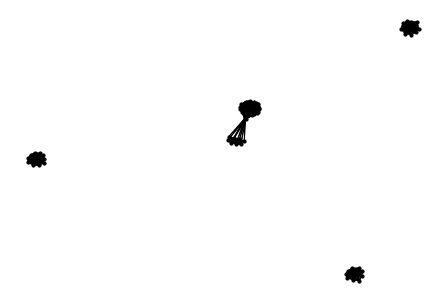

In [6]:
options = {'node_color': 'black',  
           'node_size': 10,
           'width': 1,}
nx.draw_spring(actors_network, **options)

In [7]:
#directors_network = nx.Graph()
#errors_directors = []
#for i, movie_id in enumerate(df['id'], start = 0):
#    if not i % 100: 
#         print(str((i/number_of_movies)*100) +'% done')
#    try:
#        crew = df.loc[df['id']==movie_id]['crew'].item()
#        crew_objects = ast.literal_eval(crew)
#        list_of_directors = get_directors(crew_objects)
#        print(list_of_directors)
#        for index, director1 in enumerate(list_of_directors,start = 0):
#            if not director1 in directors_network: 
#                directors_network.add_node(director1)
#            for directors2 in list_of_directors[index:]:
#                if not directors2 in directors_network: 
#                    directors_network.add_node(directors2)
#                directors_network.add_edge(directors1, directors2)
#    except:
#        errors_directors.append(['error in movie with id: '+ str(movie_id)])